<a href="https://colab.research.google.com/github/armelyara/Binary_classification/blob/main/Keras_3_0_The_Sequantial_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import packages
import os
import zipfile
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [29]:
os.environ["KERAS_BACKEND"] = "tensorflow"

In [15]:
# Create data pathfile
local_zip = 'keras_seq.zip'


zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('forestvsmount')
zip_ref.close()

# Define the datasate path
base_dir = 'forestvsmount/'
train_dir = 'forestvsmount/keras_seq/train/'
test_dir = 'forestvsmount/keras_seq/test/'

In [18]:
train_dir = os.path.join(base_dir, 'keras_seq/train/')
test_dir = os.path.join(base_dir, 'keras_seq/test/')

# Dossier des données d'entrainement forest/mountain
train_forest_dir = os.path.join(train_dir, 'forest')
train_mountain_dir = os.path.join(train_dir, 'mountain')


# Dossier des données de validation forest/mountain
test_forest_dir = os.path.join(test_dir, 'forest')
test_mountain_dir = os.path.join(test_dir, 'mountain')


In [19]:
#Affichage des premières images de chaque catégorie
train_mountain_fnames = os.listdir( train_forest_dir )
train_forest_fnames = os.listdir( train_mountain_dir )


print(train_mountain_fnames[:10])
print(train_forest_fnames[:10])


['1670.jpg', '18267.jpg', '7940.jpg', '17149.jpg', '16792.jpg', '19129.jpg', '928.jpg', '16498.jpg', '7507.jpg', '18158.jpg']
['7346.jpg', '6101.jpg', '17364.jpg', '8436.jpg', '10482.jpg', '18102.jpg', '2702.jpg', '11491.jpg', '8472.jpg', '3313.jpg']


In [20]:
#Affichage du nombre total d'image de mountain et forêt dans les dossiers `train` et `test`:

print('total training mountain images :', len(os.listdir(      train_mountain_dir ) ))
print('total training forest images :', len(os.listdir(      train_forest_dir ) ))


print('total test mountain images :', len(os.listdir( test_mountain_dir )))
print('total test forest images :', len(os.listdir( test_forest_dir ) ))


total training mountain images : 2512
total training forest images : 2271
total test mountain images : 525
total test forest images : 474


In [37]:
"""### Data Preprocessing

Configurons le data generators qui lira les images dans notre dossier source folders, les convertira convert en `float32` tenseurs et les fournira (avec leur label) au réseau.
Nous avons un générateur pour l'entrainement des images et un autre pour les images de validation.
Nos generateurs donneront des lots de 20 images de taille 150x150 et leurs étiquettes (binaire).
"""

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='categorical',
                                                    target_size=(300, 300))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=5,
                                                         class_mode  = 'categorical',
                                                         target_size = (300, 300))

Found 4783 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [38]:

model = keras.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    keras.layers.Input(shape=(300, 300, 3)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    # 512 neuron hidden layer
    keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('mountain') and 1 for the other ('forest')
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 71, 71, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 35, 35, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 33, 33, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,319,490 (12.66 MB)

 Trainable params: 3,319,490 (12.66 MB)

 Non-trainable params: 0 (0.00 B)

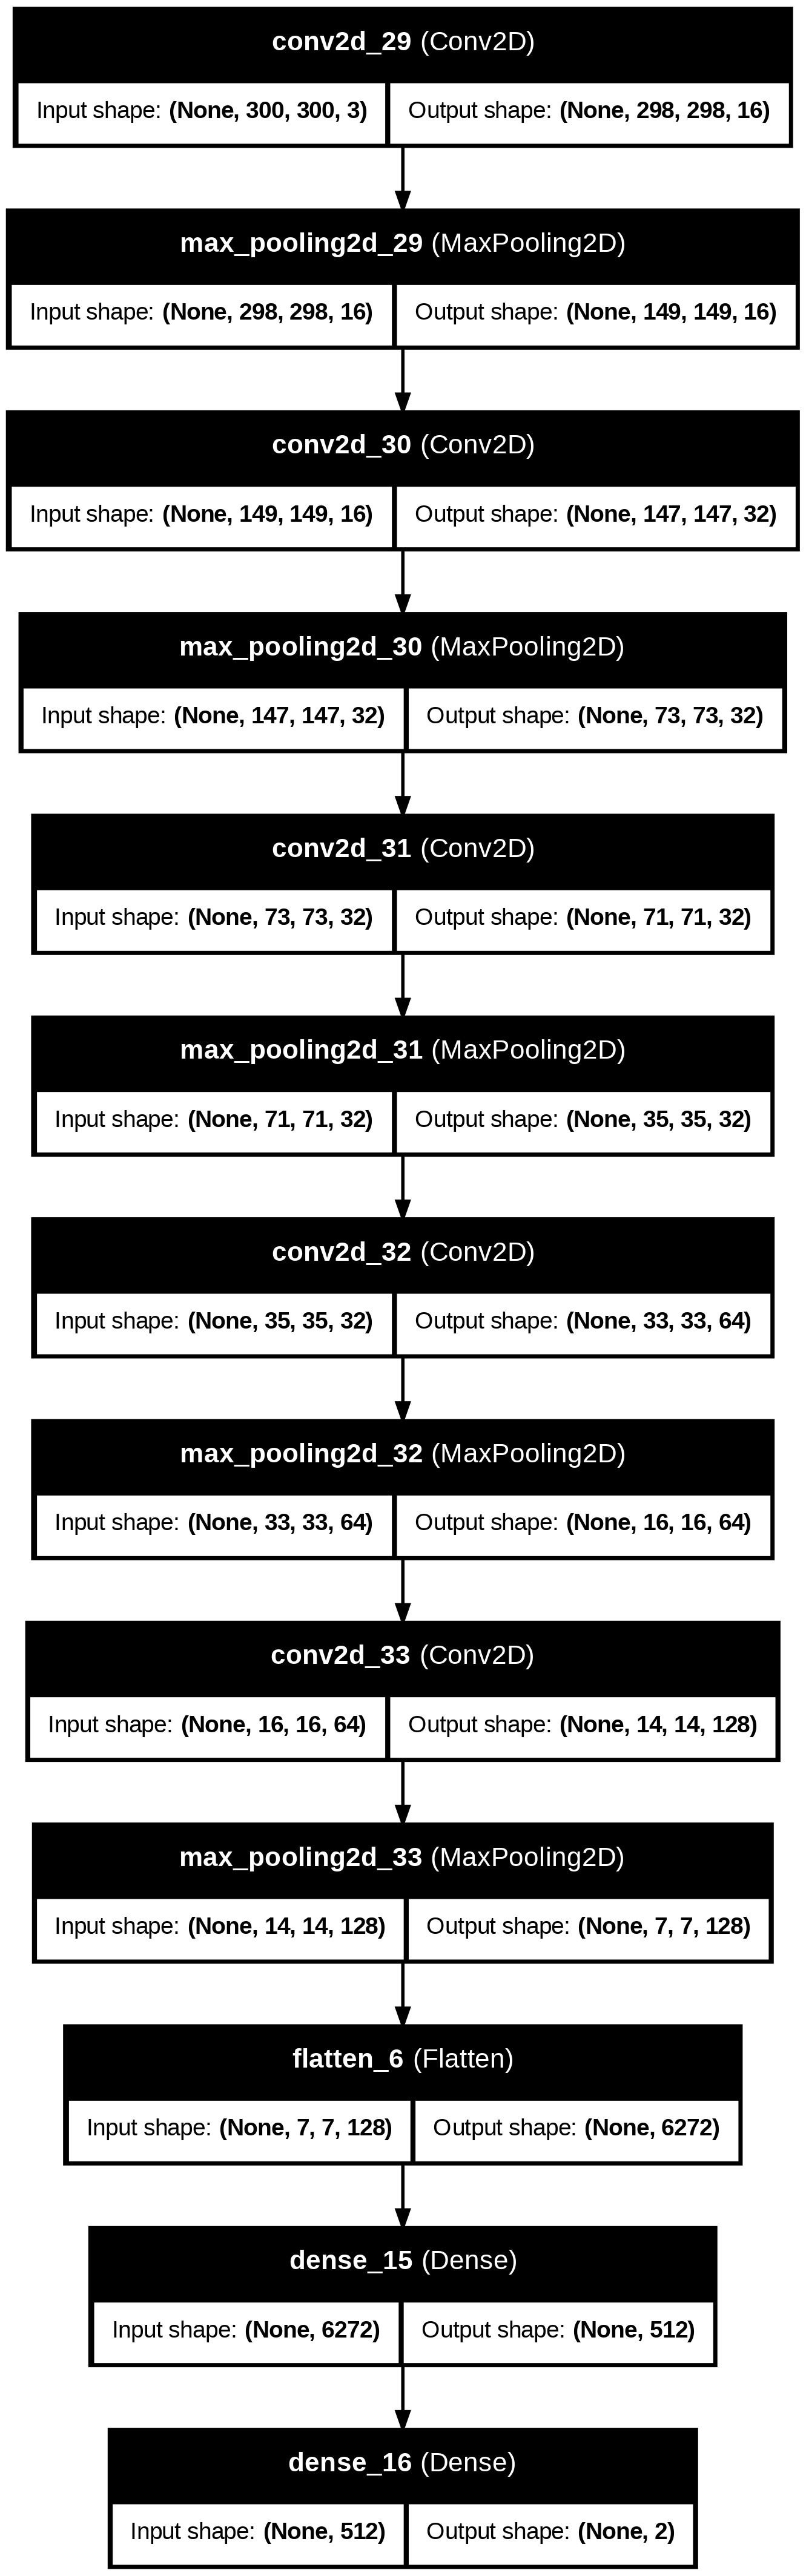

In [39]:
import tensorflow as tf # Assuming you're using TensorFlow
from keras.utils import plot_model
# Assuming you have your Keras model defined as 'model'
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
"""La colonne "output shape" montre la taille des caractéristiques évoluant succesivement dans chaque couche.
Les couches de convolution reduisent la taille des caractéristiques sans toutefois modifier l'originalité de l'image
"""

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [41]:
"""### Entrainement
Nous allons lancer l'entrainement sur environ 2000 images disponibles pour 50 epoque et valider sur 1000 images de test.




Vous verrez 4 valeurs par epoque -- Loss, Accuracy, Validation Loss et Validation Accuracy.

Le Loss et Accuracy sont de bonnes indications de la progression de l'entrainement.

"""

history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=5,
                              epochs=15,
                              validation_steps=5,
                              verbose=2)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 - 5s - 1s/step - accuracy: 0.3200 - loss: 0.7094 - val_accuracy: 0.3600 - val_loss: 0.7064
Epoch 2/15
5/5 - 3s - 538ms/step - accuracy: 0.5600 - loss: 0.6933 - val_accuracy: 0.6400 - val_loss: 0.6770
Epoch 3/15
5/5 - 4s - 759ms/step - accuracy: 0.5200 - loss: 0.6927 - val_accuracy: 0.6400 - val_loss: 0.6366
Epoch 4/15
5/5 - 3s - 628ms/step - accuracy: 0.3200 - loss: 0.6821 - val_accuracy: 0.9600 - val_loss: 0.5979
Epoch 5/15
5/5 - 3s - 519ms/step - accuracy: 0.7600 - loss: 0.7480 - val_accuracy: 0.8800 - val_loss: 0.5239
Epoch 6/15
5/5 - 2s - 499ms/step - accuracy: 0.6400 - loss: 0.6342 - val_accuracy: 0.8400 - val_loss: 0.5522
Epoch 7/15
5/5 - 3s - 517ms/step - accuracy: 0.7200 - loss: 0.7489 - val_accuracy: 0.8800 - val_loss: 0.5462
Epoch 8/15
5/5 - 4s - 771ms/step - accuracy: 0.9200 - loss: 0.4731 - val_accuracy: 0.9600 - val_loss: 0.2720
Epoch 9/15
5/5 - 3s - 534ms/step - accuracy: 0.9200 - loss: 0.2944 - val_accuracy: 0.9600 - val_loss: 0.2477
Epoch 10/15
5/5 - 3s - 502ms/step

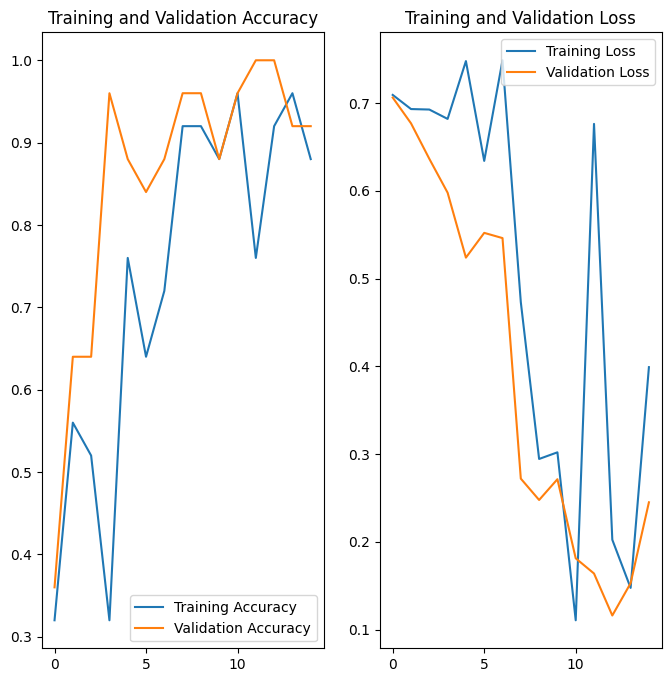

In [45]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 15
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
#Tester le modèle avec des images
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  # prediction images
  path='/content/' + fn
  img=image.load_img(path, target_size=(300, 300))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes.any():
    print(fn + "is a mountain")

  else:
    print(fn + "is a forest")


Saving Flat-Country-credit-Cascadia-Wildlands-DSC_4323.jpeg to Flat-Country-credit-Cascadia-Wildlands-DSC_4323.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[1. 0.]
Flat-Country-credit-Cascadia-Wildlands-DSC_4323.jpegis a mountain
